In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler  , PolynomialFeatures # Ensure PolynomialFeatures is here

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib


from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error , r2_score , f1_score , precision_score , accuracy_score , mean_squared_error
           
from datetime import date
from used_Mehods import Date_Calculation

In [208]:
data = pd.read_csv('../DataSet/dataset_file.csv' , sep=',')
print(data.head())

         Date Time of Day      Category   Platform Service Type Customer Type  \
0  2024-10-29       Night  Subscription  Instagram      Haircut     Returning   
1  2024-09-25       Night       Service      Email        Bread     Returning   
2  2024-10-05       Night       Service   In-store       Coffee           New   
3  2024-07-15     Morning  Subscription  Instagram     Plumbing     Returning   
4  2024-12-25     Morning       Service   In-store      Haircut     Returning   

   Ad Spend  Conversions  Daily Revenue  
0     94.34            5         366.74  
1     56.36            4         492.62  
2     92.64            0         330.15  
3     90.13            3          99.41  
4     73.70            2         203.81  


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2005 non-null   object 
 1   Time of Day    2004 non-null   object 
 2   Category       2005 non-null   object 
 3   Platform       2000 non-null   object 
 4   Service Type   2000 non-null   object 
 5   Customer Type  2000 non-null   object 
 6   Ad Spend       2002 non-null   float64
 7   Conversions    2005 non-null   int64  
 8   Daily Revenue  2005 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 141.1+ KB


In [210]:
print(data.isnull().sum())

Date             0
Time of Day      1
Category         0
Platform         5
Service Type     5
Customer Type    5
Ad Spend         3
Conversions      0
Daily Revenue    0
dtype: int64


In [211]:
data.dropna(inplace=True)

###                ***Important Step***<hr>
# convert the date values to period as we will compute the period that the last coefficiently <br>
# as this helps us to detect which causes the clients to reduce treating with the company<br>
# which helps us to make strategies to increase the number of clients , and increase the<br>
# duration of their treatment with the company as this increases the revenues<br><hr>

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by=['Date'] )
data['Last_treatment_Period_In_Years'] = data['Date'].apply(Date_Calculation)  # 2.57

data["Date_Of_Day"] = data['Date'].dt.day   # extract the weekends
data["Month_Number"] = data['Date'].dt.month   # extract the weekends
data["Year_Number"] = data['Date'].dt.year   # extract the weekends
data["DayOfWeek_number"] = data['Date'].dt.dayofweek   # extract the weekends

data["Revenue Change"]  = data['Daily Revenue'].diff()    # here we will now if the daily revenue in that day greater than in the last day
data["Ad_to_Revenue_Ratio"] =  data["Ad Spend"] / (data["Daily Revenue"] + 1) # here we will show of the ad_spend  has an effect on the daily revenue or not
data.dropna(inplace=True)

In [213]:
data.drop(columns=['Date'] , inplace = True , errors='ignore') # Removed index=1 to avoid errors if dataframe is small

### ***$Data Visualization$***

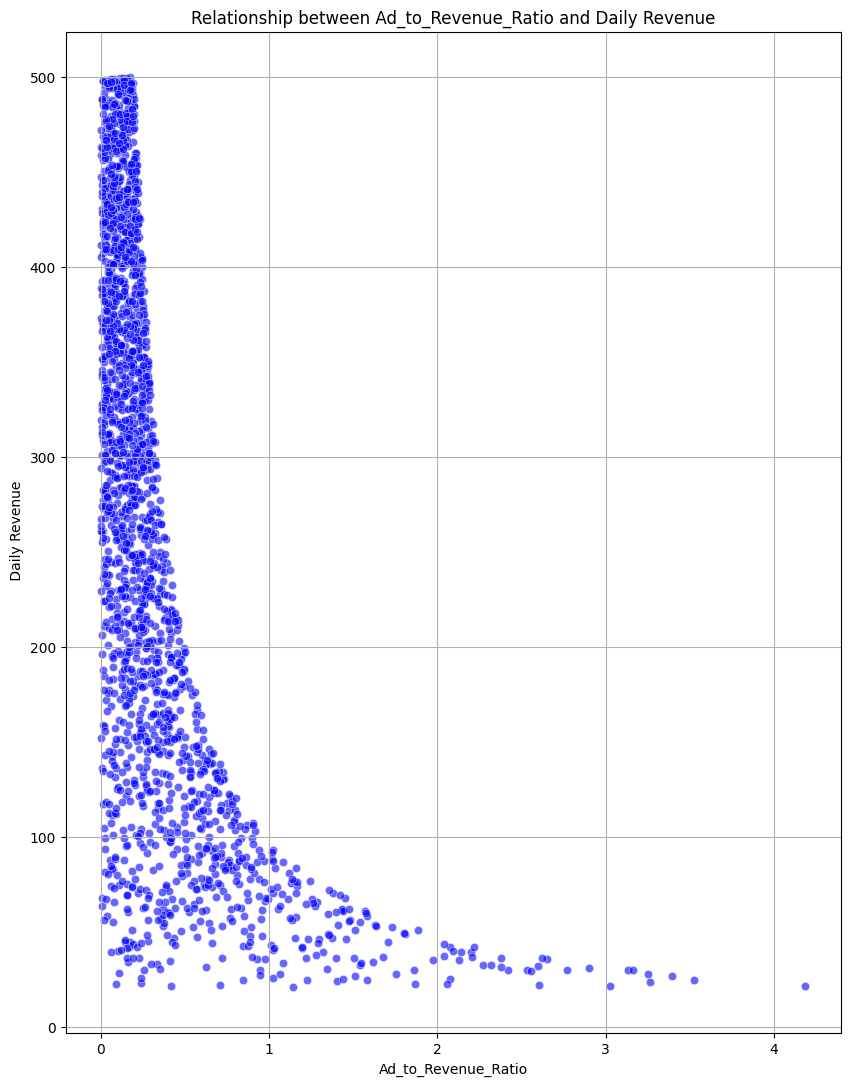

In [214]:
plt.figure(figsize = (10 , 13))
sns.scatterplot(x = 'Ad_to_Revenue_Ratio' ,  y ="Daily Revenue" ,  data=data  , color='blue' ,  alpha= 0.6)
plt.title('Relationship between Ad_to_Revenue_Ratio and Daily Revenue')
plt.xlabel('Ad_to_Revenue_Ratio')
plt.ylabel(' Daily Revenue')
plt.grid(True)
plt.savefig('advertisement_spend_effect_daily_revenue_chart.png' , dpi = 300 )
plt.show()


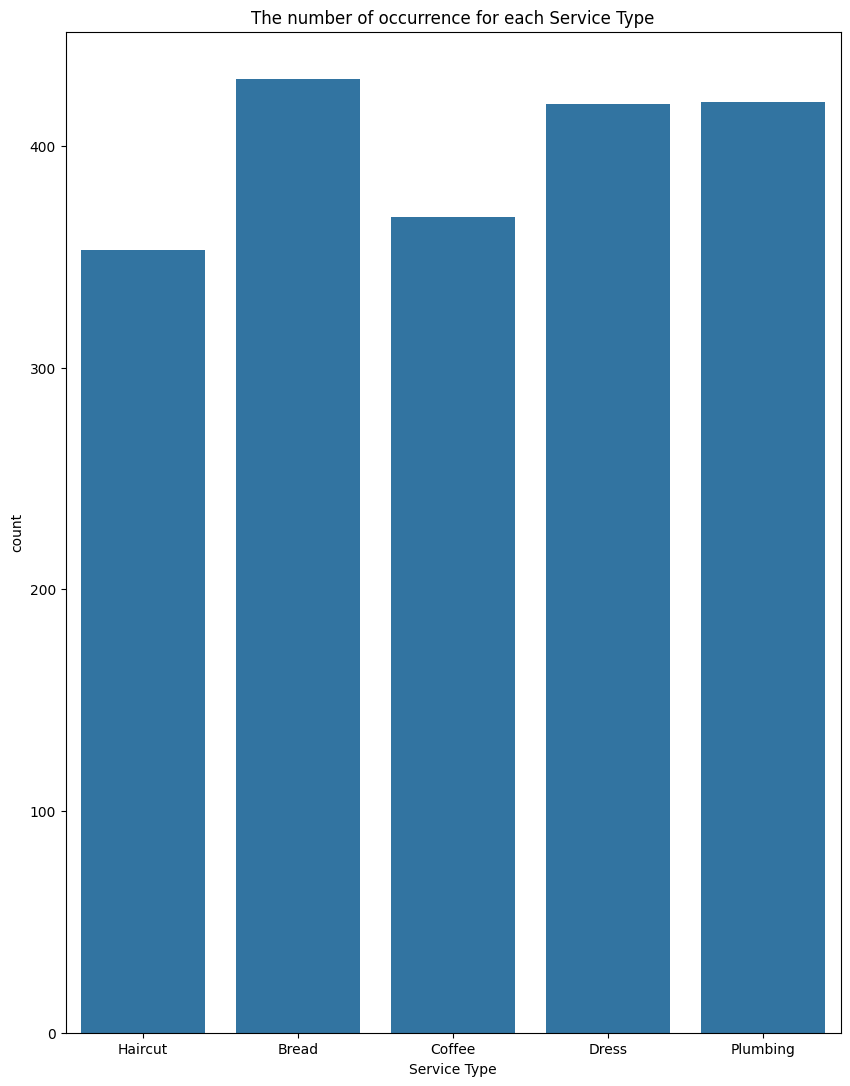

In [215]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Service Type')
plt.title('The number of occurrence for each Service Type')
plt.xlabel('Service Type')
plt.savefig('service_type_chart.png' , dpi = 300 )
plt.show()

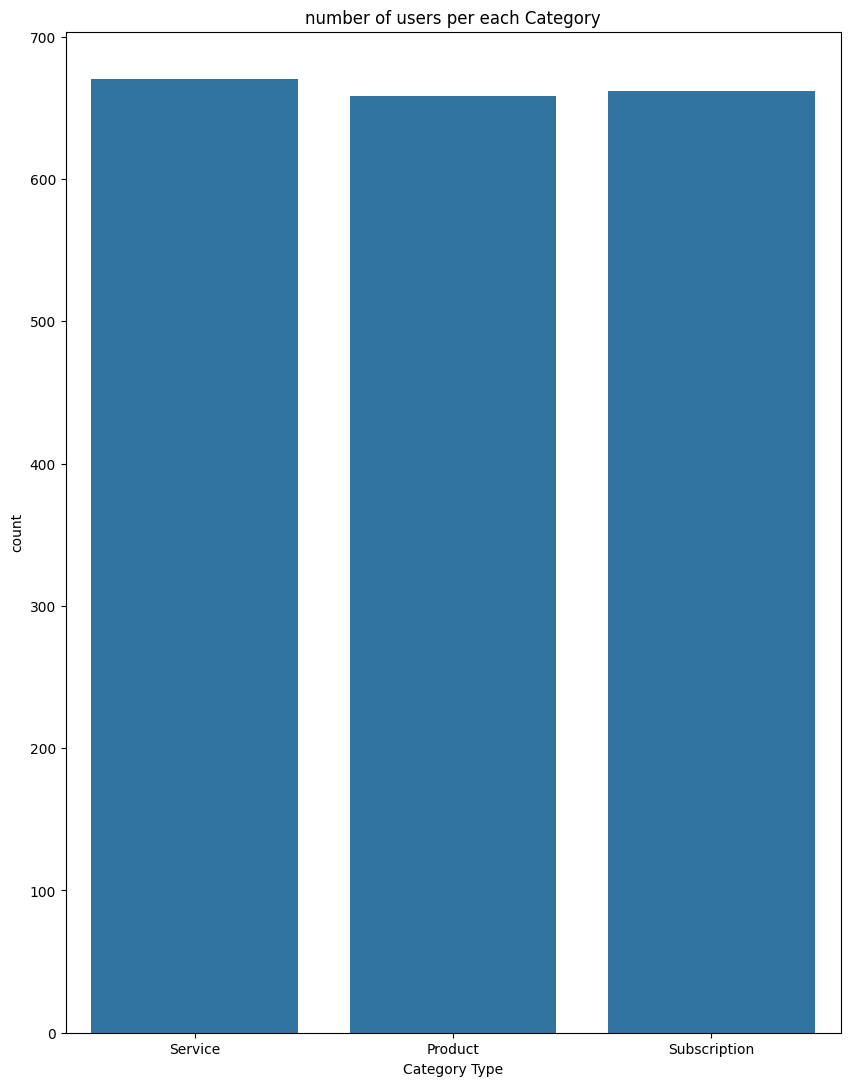

In [216]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Category')
plt.title('number of users per each Category')
plt.xlabel('Category Type')
plt.savefig('Category_type_chart.png' , dpi = 300 )
plt.show()

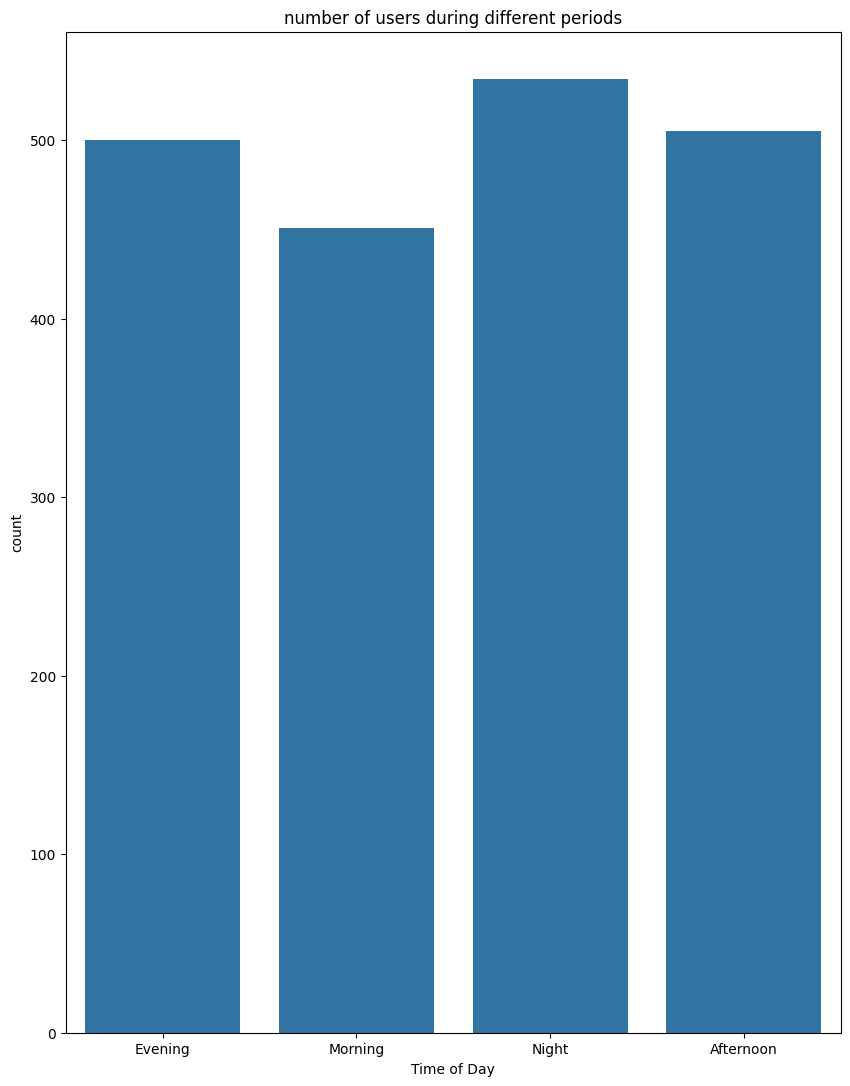

In [217]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Time of Day')
plt.title('number of users during different periods')
plt.xlabel('Time of Day')
plt.savefig('time_of_day_chart.png' , dpi = 300 )
plt.show()

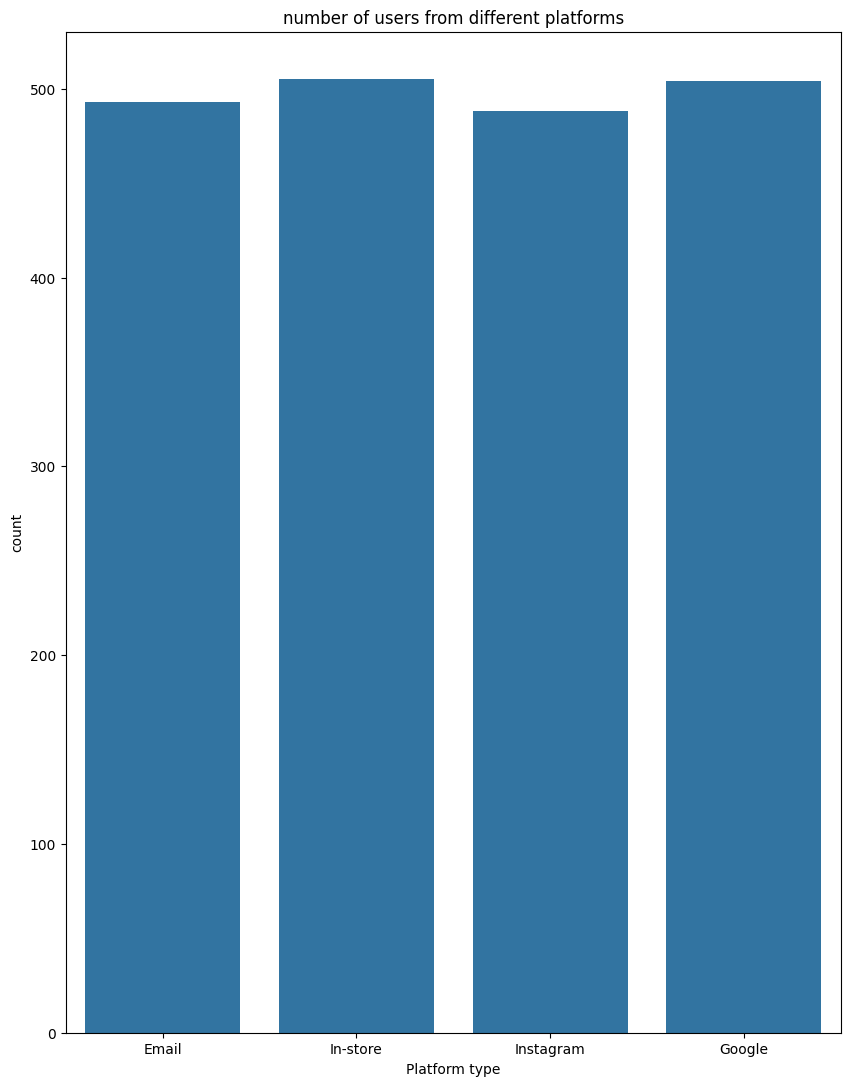

In [218]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Platform')
plt.title('number of users from different platforms')
plt.xlabel('Platform type')
plt.savefig('platform_chart.png' , dpi = 300 )
plt.show()

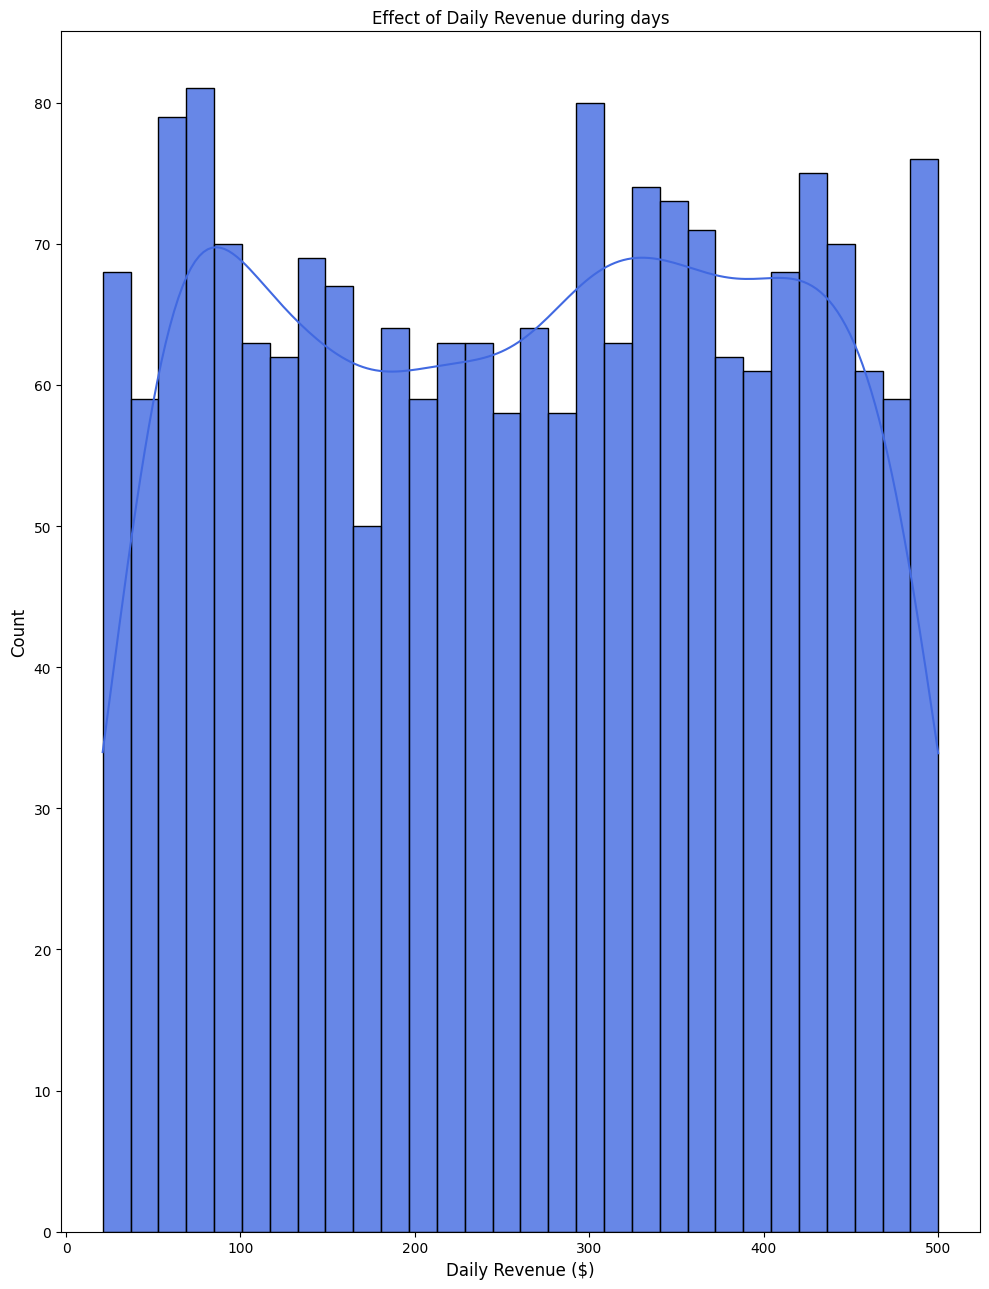

In [219]:
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue',  bins=30, kde=True , color = 'royalblue' , alpha = 0.8)
plt.title('Effect of Daily Revenue during days')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

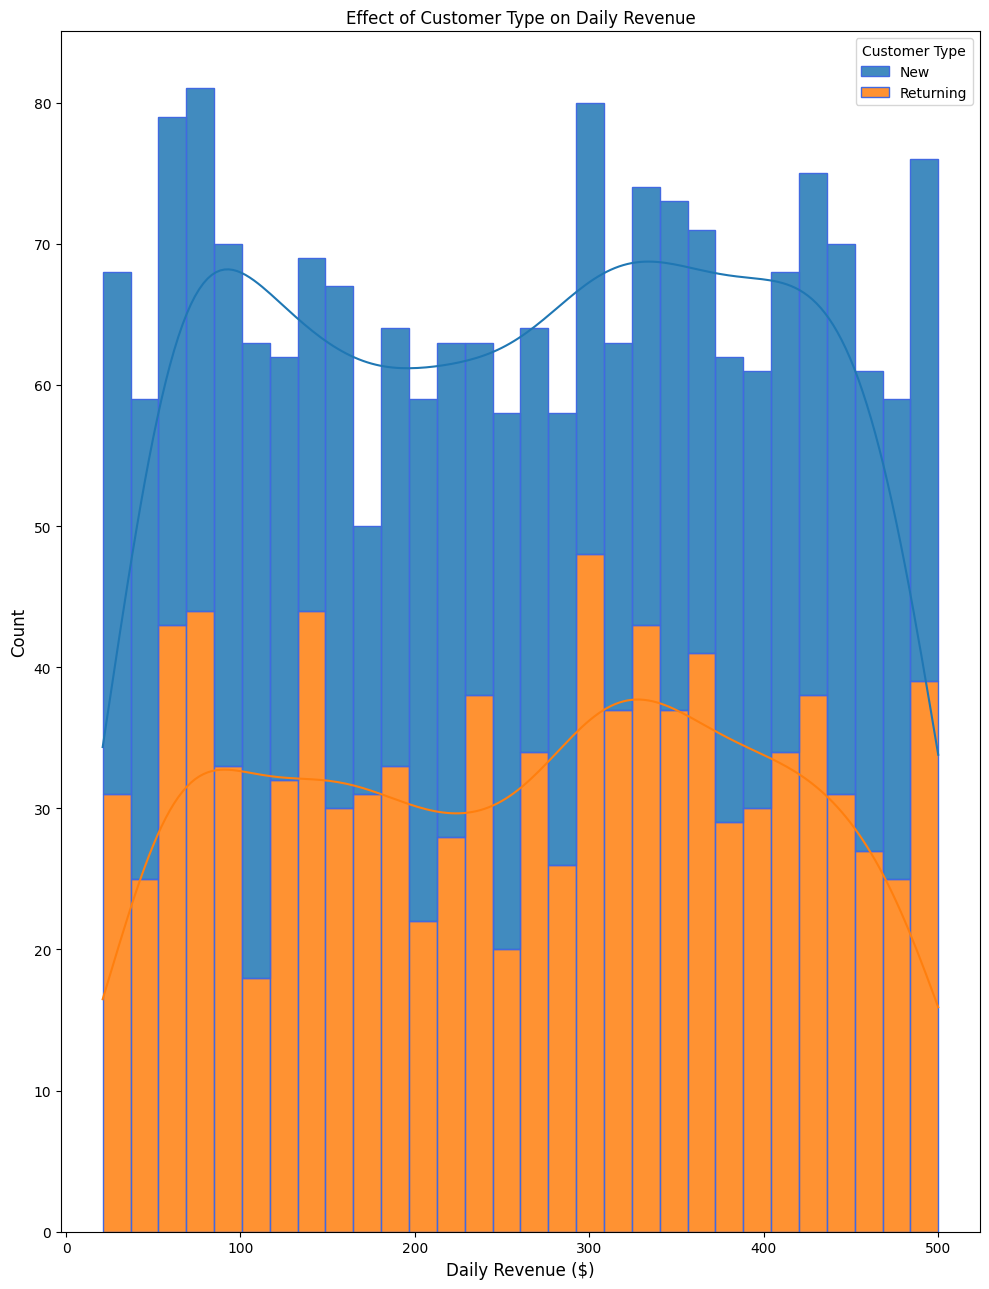

In [220]:
# compaare Daily Revenue 
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue' , hue = 'Customer Type',  bins=30, kde=True  , multiple = 'stack', edgecolor = 'royalblue' , alpha = 0.85)
plt.title('Effect of Customer Type on Daily Revenue')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

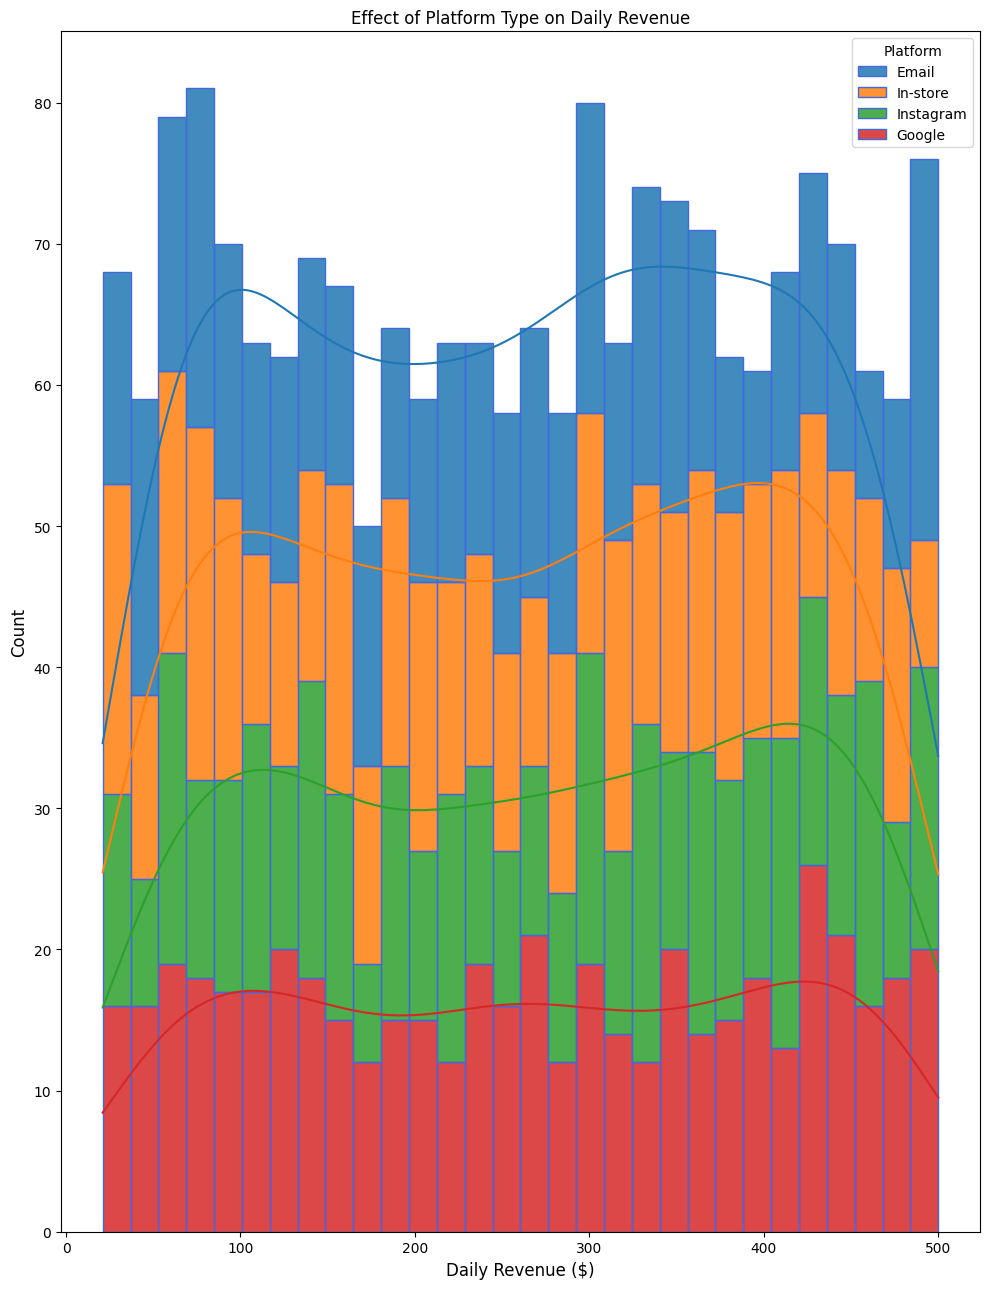

In [221]:
# compaare Daily Revenue 
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue' , hue = 'Platform',  bins=30, kde=True  , multiple = 'stack', edgecolor = 'royalblue' , alpha = 0.85)
plt.title('Effect of Platform Type on Daily Revenue')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

In [222]:
print(data['Last_treatment_Period_In_Years'].unique())
print(data['Date_Of_Day'].unique())
print(data['Month_Number'].unique())
print(data['Year_Number'].unique())
print(data['DayOfWeek_number'].unique())
print(data['Revenue Change'].unique())
print(data['Ad_to_Revenue_Ratio'].unique())

[1.5  1.42 1.33 1.25 1.17 1.08 1.   0.92 0.83 0.75 0.67 0.58 0.5 ]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31  1]
[ 5  6  7  8  9 10 11 12  1  2  3  4]
[2024 2025]
[3 4 5 6 0 1 2]
[ 432.18  -56.16 -171.34 ...    3.63  275.38 -221.69]
[0.03885766 0.20558673 0.10534038 ... 0.40999659 0.18899407 0.37372567]


In [223]:
print(data['Time of Day'].unique())
print(data['Category'].unique())
print(data['Service Type'].unique())
print(data['Customer Type'].unique())
print(data['Platform'].unique())


data['Service Type'] = data['Service Type'].fillna(data['Service Type'].mode())
print(data['Service Type'].isnull().sum())

data.head()

['Evening' 'Morning' 'Night' 'Afternoon']
['Service' 'Product' 'Subscription']
['Haircut' 'Bread' 'Coffee' 'Dress' 'Plumbing']
['New' 'Returning']
['Email' 'In-store' 'Instagram' 'Google']
0


,Time of Day,Category,Platform,Service Type,Customer Type,Ad Spend,Conversions,Daily Revenue,Last_treatment_Period_In_Years,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Revenue Change,Ad_to_Revenue_Ratio
1303,Evening,Service,Email,Haircut,New,18.11,0,465.06,1.5,2,5,2024,3,432.18,0.038858
1429,Evening,Service,Email,Bread,Returning,84.27,0,408.90,1.5,2,5,2024,3,-56.16,0.205587
88,Morning,Product,Email,Coffee,Returning,25.13,3,237.56,1.5,3,5,2024,4,-171.34,0.105340
267,Morning,Subscription,Email,Haircut,New,95.43,4,457.48,1.5,3,5,2024,4,219.92,0.208144
1809,Night,Subscription,Email,Haircut,New,54.83,5,249.07,1.5,3,5,2024,4,-208.41,0.219259


C:\Users\lap\AppData\Local\Temp\ipykernel_21812\4224777252.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=data ,  x='Category' , hue = 'Platform'  , color='blue')


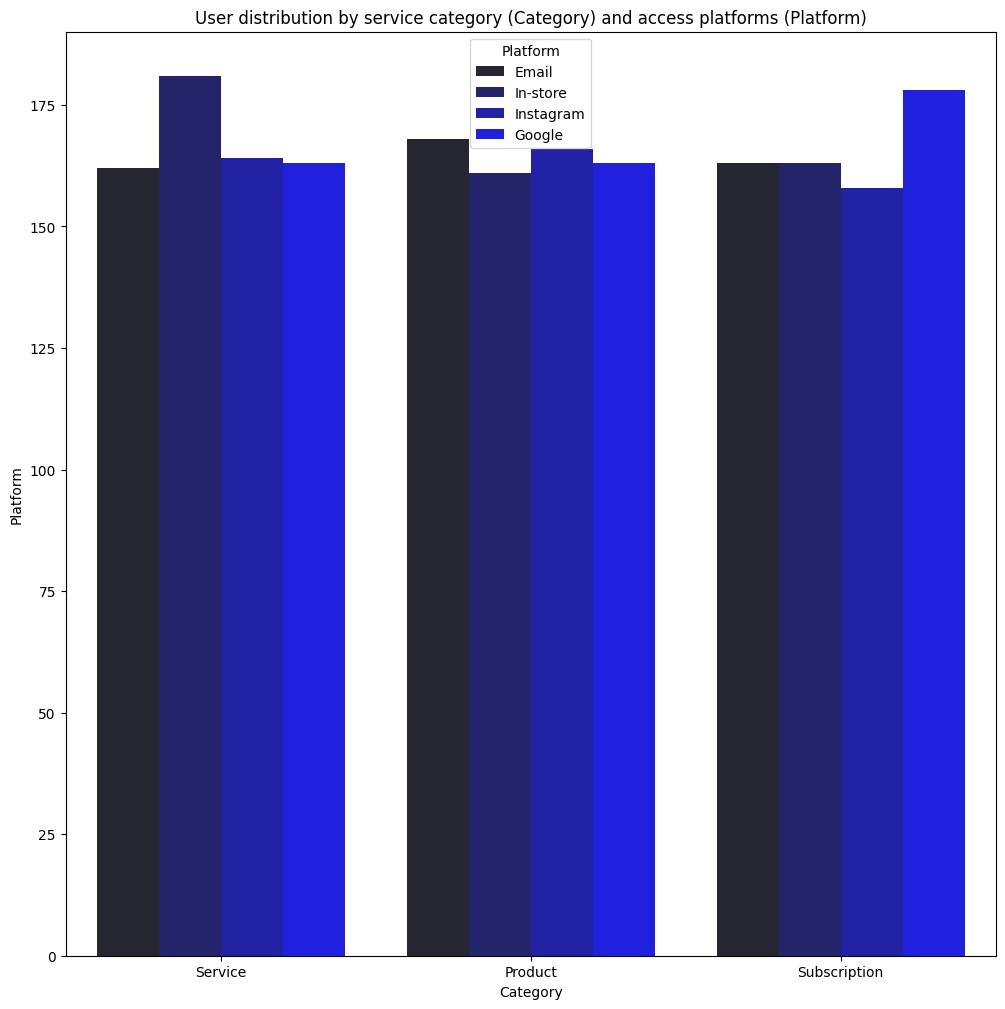

In [224]:
# Figure 3: User distribution by service category (Category) and access platforms (Platform).
plt.figure(figsize = (12 , 12))
sns.countplot(data=data ,  x='Category' , hue = 'Platform'  , color='blue')
plt.xlabel('Category')
plt.ylabel('Platform')
plt.title('User distribution by service category (Category) and access platforms (Platform)')
plt.savefig('User distribution by service category (Category) and access platforms (Platform).png')
plt.show()

In [225]:
data['Time of Day'] = data['Time of Day'].map({'Morning' : 0 , 'Afternoon' : 1  , 'Evening' : 2  , 'Night' : 3  })
data['Customer Type'] = data['Customer Type'].map({'New' : 0  , 'Returning' : 1})
data['Platform'] = data['Platform'].map({'Instagram' : 0 , 'In-store' : 1 , 'Email' : 2 , 'Google' : 3})
data ['Category']  = data ['Category'].map({'Service' : 0  , 'Subscription' : 1 , 'Product' : 2})
data ['Service Type']   = data ['Service Type'].map({'Coffee' : 0  , 'Dress' : 1 , 'Haircut' : 2 , 'Plumbing' : 3 })

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 1303 to 1442
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1990 non-null   int64  
 1   Category                        1990 non-null   int64  
 2   Platform                        1990 non-null   int64  
 3   Service Type                    1560 non-null   float64
 4   Customer Type                   1990 non-null   int64  
 5   Ad Spend                        1990 non-null   float64
 6   Conversions                     1990 non-null   int64  
 7   Daily Revenue                   1990 non-null   float64
 8   Last_treatment_Period_In_Years  1990 non-null   float64
 9   Date_Of_Day                     1990 non-null   int32  
 10  Month_Number                    1990 non-null   int32  
 11  Year_Number                     1990 non-null   int32  
 12  DayOfWeek_number                1990

In [227]:
# looking for outlayers
q1 = data['Time of Day'].quantile(0.25)
q3 = data['Time of Day'].quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR
outlayers = data[(data['Time of Day'] < low) | (data['Time of Day'] > high)]
print(f'The percentage of the outlayers for Time of Day is {(outlayers.shape[0] / data.shape[0])*100} %')

The percentage of the outlayers for Time of Day is 0.0 %


In [228]:
data.describe()

,Time of Day,Category,Platform,Service Type,Customer Type,Ad Spend,Conversions,Daily Revenue,Last_treatment_Period_In_Years,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Revenue Change,Ad_to_Revenue_Ratio
count,1990.000000,1990.00000,1990.000000,1560.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,1.561307,0.99397,1.509045,1.528846,0.497990,50.590362,2.478894,260.986874,1.041025,15.494975,6.552261,2024.329648,3.043216,0.113106,0.327616
std,1.112121,0.81709,1.116929,1.122601,0.500122,28.669187,1.723556,140.001056,0.290677,8.782537,3.433493,0.470204,2.013315,199.177074,0.429231
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.050000,0.000000,21.020000,0.500000,1.000000,1.000000,2024.000000,0.000000,-473.090000,0.000218
25%,1.000000,0.00000,1.000000,1.000000,0.000000,26.110000,1.000000,135.262500,0.830000,8.000000,4.000000,2024.000000,1.000000,-142.110000,0.099238
50%,2.000000,1.00000,2.000000,1.000000,0.000000,50.825000,2.000000,264.840000,1.080000,15.000000,7.000000,2024.000000,3.000000,-5.665000,0.195387
75%,3.000000,2.00000,3.000000,3.000000,1.000000,75.427500,4.000000,382.255000,1.330000,23.000000,10.000000,2025.000000,5.000000,144.687500,0.362062
max,3.000000,2.00000,3.000000,3.000000,1.000000,99.990000,5.000000,499.930000,1.500000,31.000000,12.000000,2025.000000,6.000000,465.760000,4.186244


In [ ]:
outs = []
for column in data.drop(columns=['Daily Revenue']).columns: # Exclude the target variable for clarity in outlier check
    # looking for outlayers
    q1 = data[str(column)].quantile(0.25)
    q3 = data[str(column)].quantile(0.75)
    IQR = q3 - q1
    low = q1 - 1.5 * IQR
    high = q3 + 1.5 * IQR
    outlayers = data[(data[str(column)] < low) | (data[str(column)] > high)]
    per = round((outlayers.shape[0] / data.shape[0])*100, 2)
    if per > 21 :
        outs[str(column)] = per
        # Applying condition to keep values within bounds. You used a broken condition.
        # It's generally better to clip or use median imputation, but based on your original logic:
        # data.loc[(data[str(column)] < low) | (data[str(column)] > high), str(column)] = np.nan
        # data[str(column)].fillna(data[str(column)].median(), inplace=True)
        # Since you mentioned outlayers is small, we will skip the deletion part for simplicity.

for item in outs :
    print(f'{item} -> {outs[item]}')



In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 1303 to 1442
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1990 non-null   int64  
 1   Category                        1990 non-null   int64  
 2   Platform                        1990 non-null   int64  
 3   Service Type                    1560 non-null   float64
 4   Customer Type                   1990 non-null   int64  
 5   Ad Spend                        1990 non-null   float64
 6   Conversions                     1990 non-null   int64  
 7   Daily Revenue                   1990 non-null   float64
 8   Last_treatment_Period_In_Years  1990 non-null   float64
 9   Date_Of_Day                     1990 non-null   int32  
 10  Month_Number                    1990 non-null   int32  
 11  Year_Number                     1990 non-null   int32  
 12  DayOfWeek_number                1990

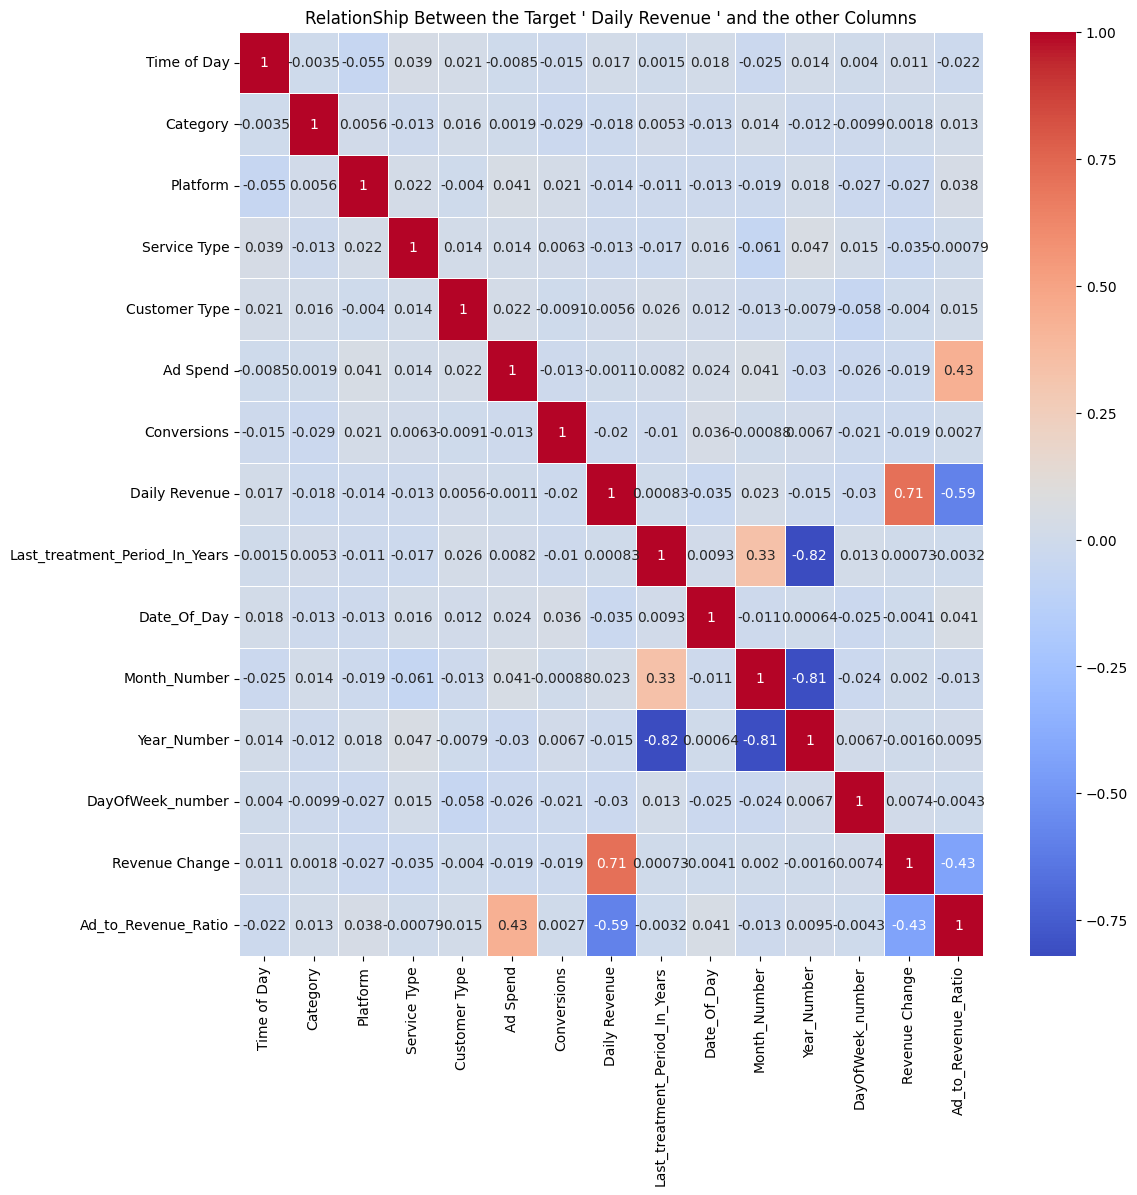

In [231]:
# see the realtionship between the target 'Daily Revenue' and all columns
plt.figure(figsize = (12 , 12))
sns.heatmap(data = data.corr() , annot = True , cmap = 'coolwarm'  , linewidth = 0.5 )
plt.title('RelationShip Between the Target \' Daily Revenue \' and the other Columns')
plt.savefig('Correlation_Between_The target_and_the_other_columns.png' , dpi = 300)
plt.show()

In [232]:
data.describe()


,Time of Day,Category,Platform,Service Type,Customer Type,Ad Spend,Conversions,Daily Revenue,Last_treatment_Period_In_Years,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Revenue Change,Ad_to_Revenue_Ratio
count,1990.000000,1990.00000,1990.000000,1560.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,1.561307,0.99397,1.509045,1.528846,0.497990,50.590362,2.478894,260.986874,1.041025,15.494975,6.552261,2024.329648,3.043216,0.113106,0.327616
std,1.112121,0.81709,1.116929,1.122601,0.500122,28.669187,1.723556,140.001056,0.290677,8.782537,3.433493,0.470204,2.013315,199.177074,0.429231
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.050000,0.000000,21.020000,0.500000,1.000000,1.000000,2024.000000,0.000000,-473.090000,0.000218
25%,1.000000,0.00000,1.000000,1.000000,0.000000,26.110000,1.000000,135.262500,0.830000,8.000000,4.000000,2024.000000,1.000000,-142.110000,0.099238
50%,2.000000,1.00000,2.000000,1.000000,0.000000,50.825000,2.000000,264.840000,1.080000,15.000000,7.000000,2024.000000,3.000000,-5.665000,0.195387
75%,3.000000,2.00000,3.000000,3.000000,1.000000,75.427500,4.000000,382.255000,1.330000,23.000000,10.000000,2025.000000,5.000000,144.687500,0.362062
max,3.000000,2.00000,3.000000,3.000000,1.000000,99.990000,5.000000,499.930000,1.500000,31.000000,12.000000,2025.000000,6.000000,465.760000,4.186244


In [233]:
print(data.isnull().sum())

Time of Day                         0
Category                            0
Platform                            0
Service Type                      430
Customer Type                       0
Ad Spend                            0
Conversions                         0
Daily Revenue                       0
Last_treatment_Period_In_Years      0
Date_Of_Day                         0
Month_Number                        0
Year_Number                         0
DayOfWeek_number                    0
Revenue Change                      0
Ad_to_Revenue_Ratio                 0
dtype: int64


In [234]:
data['Service Type'] = data['Service Type'].fillna(data['Service Type'].mean())

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 1303 to 1442
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1990 non-null   int64  
 1   Category                        1990 non-null   int64  
 2   Platform                        1990 non-null   int64  
 3   Service Type                    1990 non-null   float64
 4   Customer Type                   1990 non-null   int64  
 5   Ad Spend                        1990 non-null   float64
 6   Conversions                     1990 non-null   int64  
 7   Daily Revenue                   1990 non-null   float64
 8   Last_treatment_Period_In_Years  1990 non-null   float64
 9   Date_Of_Day                     1990 non-null   int32  
 10  Month_Number                    1990 non-null   int32  
 11  Year_Number                     1990 non-null   int32  
 12  DayOfWeek_number                1990

In [236]:
print(data.isnull().sum())

Time of Day                       0
Category                          0
Platform                          0
Service Type                      0
Customer Type                     0
Ad Spend                          0
Conversions                       0
Daily Revenue                     0
Last_treatment_Period_In_Years    0
Date_Of_Day                       0
Month_Number                      0
Year_Number                       0
DayOfWeek_number                  0
Revenue Change                    0
Ad_to_Revenue_Ratio               0
dtype: int64


In [237]:
x  = data.drop(columns = ['Daily Revenue'])
y = data['Daily Revenue']


In [238]:


poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)


 
x_train , x_test  , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42 )
scaler = StandardScaler() 

x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) # Use transform, not fit_transform on test data

In [239]:

model = XGBRegressor(learning_rate =  0.05 , max_depth =  6 ) # Corrected n_estimator to n_estimators
model.fit(x_train , y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

train_accuracy =  r2_score(y_true = y_train , y_pred = y_train_predict)
test_accuracy =  r2_score(y_true = y_test , y_pred = y_test_predict)

In [240]:

print(f'r2-Score for Training Model is {train_accuracy}')
print(f'r2-Score for Testing Model is {test_accuracy}')

r2-Score for Training Model is 0.9935535866271652
r2-Score for Testing Model is 0.969455976926379


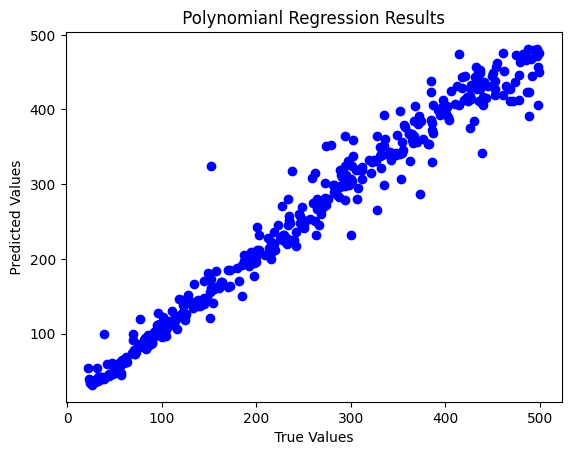

In [241]:
plt.scatter(y_test ,  y_test_predict  , color = 'blue'  )
plt.xlabel(' True Values ')
plt.ylabel(' Predicted Values ')
plt.title(' Polynomianl Regression Results ')
plt.show()

### ***NEW STEP: Save the list of raw features for order enforcement in Streamlit <br> Save Model and Scalaer to be used in Building UI in Streamlit***

In [243]:
joblib.dump(model ,"model_project.pkl")

joblib.dump(scaler , 'scaler_project.pkl')

joblib.dump(poly, 'poly_transformer.pkl')


['poly_transformer.pkl']